# Ensemble Learning

<br />

I am going to use a dataset of "Microsoft Malware Prediction" on Kaggle.

https://www.kaggle.com/c/microsoft-malware-prediction

## [Task 1] Evaluation Index

<br />

The evaluation index of the competition is AUC, an area of ROC curve.

    - This evaluation index is used to evaluate unbalanced data accurately. When a threshold is changed, True Positive Rate and False Positive Rate are also changed. Threshold is important to create a model that makes False Positive Rate small and makes True Positive Rate big.
    
    - The vertical axis of ROC curve shows True Positive Rate and the horizontal axis shows False Positive Rate.
    
    - The ideal model of ROC curve is that True Positive Rate is already high while False Positive Rate is still low.

    - Matthews Correlation Coefficient (MCC) is an evaluation index to get an accuracy of a binary classification problems. It is used when other evaluation indices are useless because all of them show high score. MCC shows correlation coefficients between correct binary classification and predicted binary classification.

## [Task 2] EDA

### Data Description

<br />

#### Columns


Unavailable or self-documenting column names are marked with an "NA".


1. MachineIdentifier - Individual machine ID

1. ProductName - Defender state information e.g. win8defender

1. EngineVersion - Defender state information e.g. 1.1.12603.0

1. AppVersion - Defender state information e.g. 4.9.10586.0

1. AvSigVersion - Defender state information e.g. 1.217.1014.0

1. IsBeta - Defender state information e.g. false

1. RtpStateBitfield - NA

1. IsSxsPassiveMode - NA

1. DefaultBrowsersIdentifier - ID for the machine's default browser

1. AVProductStatesIdentifier - ID for the specific configuration of a user's antivirus software

1. AVProductsInstalled - NA

1. AVProductsEnabled - NA

1. HasTpm - True if machine has tpm

1. CountryIdentifier - ID for the country the machine is located in

1. CityIdentifier - ID for the city the machine is located in

1. OrganizationIdentifier - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries

1. GeoNameIdentifier - ID for the geographic region a machine is located in

1. LocaleEnglishNameIdentifier - English name of Locale ID of the current user

1. Platform - Calculates platform name (of OS related properties and processor property)

1. Processor - This is the process architecture of the installed operating system

1. OsVer - Version of the current operating system

1. OsBuild - Build of the current operating system

1. OsSuite - Product suite mask for the current operating system.

1. OsPlatformSubRelease - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)

1. OsBuildLab - Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022

1. SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.

1. IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.

1. AutoSampleOptIn - This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+

1. PuaMode - Pua Enabled mode from the service

1. SMode - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed

1. IeVerIdentifier - NA

1. SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.

1. Firewall - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.

1. UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.

1. Census_MDC2FormFactor - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)

1. Census_DeviceFamily - AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone

1. Census_OEMNameIdentifier - NA

1. Census_OEMModelIdentifier - NA

1. Census_ProcessorCoreCount - Number of logical cores in the processor

1. Census_ProcessorManufacturerIdentifier - NA

1. Census_ProcessorModelIdentifier - NA

1. Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated

1. Census_PrimaryDiskTotalCapacity - Amount of disk space on primary disk of the machine in MB

1. Census_PrimaryDiskTypeName - Friendly name of Primary Disk Type - HDD or SSD

1. Census_SystemVolumeTotalCapacity - The size of the partition that the System volume is installed on in MB

1. Census_HasOpticalDiskDrive - True indicates that the machine has an optical disk drive (CD/DVD)

1. Census_TotalPhysicalRAM - Retrieves the physical RAM in MB

1. Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx

1. Census_InternalPrimaryDiagonalDisplaySizeInInches - Retrieves the physical diagonal length in inches of the primary display

1. Census_InternalPrimaryDisplayResolutionHorizontal - Retrieves the number of pixels in the horizontal direction of the internal display.

1. Census_InternalPrimaryDisplayResolutionVertical - Retrieves the number of pixels in the vertical direction of the internal display

1. Census_PowerPlatformRoleName - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device

1. Census_InternalBatteryType - NA

1. Census_InternalBatteryNumberOfCharges - NA

1. Census_OSVersion - Numeric OS version Example - 10.0.10130.0

1. Census_OSArchitecture - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64

1. Census_OSBranch - Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005

1. Census_OSBuildNumber - OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240

1. Census_OSBuildRevision - OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458

1. Census_OSEdition - Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise

1. Census_OSSkuName - OS edition friendly name (currently Windows only)

1. Census_OSInstallTypeName - Friendly description of what install was used on the machine i.e. clean

1. Census_OSInstallLanguageIdentifier - NA

1. Census_OSUILocaleIdentifier - NA

1. Census_OSWUAutoUpdateOptionsName - Friendly name of the WindowsUpdate auto-update settings on the machine.

1. Census_IsPortableOperatingSystem - Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.

1. Census_GenuineStateName - Friendly name of OSGenuineStateID. 0 = Genuine

1. Census_ActivationChannel - Retail license key or Volume license key for a machine.

1. Census_IsFlightingInternal - NA

1. Census_IsFlightsDisabled - Indicates if the machine is participating in flighting.

1. Census_FlightRing - The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.

1. Census_ThresholdOptIn - NA

1. Census_FirmwareManufacturerIdentifier - NA

1. Census_FirmwareVersionIdentifier - NA

1. Census_IsSecureBootEnabled - Indicates if Secure Boot mode is enabled.

1. Census_IsWIMBootEnabled - NA

1. Census_IsVirtualDevice - Identifies a Virtual Machine (machine learning model)

1. Census_IsTouchEnabled - Is this a touch device ?

1. Census_IsPenCapable - Is the device capable of pen input ?

1. Census_IsAlwaysOnAlwaysConnectedCapable - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .

1. Wdft_IsGamer - Indicates whether the device is a gamer device or not based on its hardware combination.

1. Wdft_RegionIdentifier - NA

In [101]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import lightgbm as lgb
# import xgboost as xgb
import time
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import gc
# from catboost import CatBoostClassifier
from tqdm import tqdm_notebook
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings("ignore")

import logging

logging.basicConfig(filename='log.txt',level=logging.DEBUG, format='%(asctime)s %(message)s')

pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)
pd.set_option('max_rows', 100)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgbm

In [8]:
# Specify types to gain memory

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [9]:
# Create a definition to reduce memory usages

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=True).sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    
    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100*(start_mem-end_mem)/start_mem))
        
    return df

In [10]:
# Create a function to plot data

def plot_categorical_feature(col, only_bars=False, top_n=10, by_touch=False):
    top_n = top_n if train[col].nunique() > top_n else train[col].nunique()
    print(f"{col} has {train[col].nunique()} unique values and type: {train[col].dtype}.")
    print(train[col].value_counts(normalize=True, dropna=False).head())
    if not by_touch:
        if not only_bars:
            df = train.groupby([col]).agg({'HasDetections': ['count', 'mean']})
            df = df.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
            data = [go.Bar(x=df.index, y=df['HasDetections']['count'].values, name='counts'),
                    go.Scatter(x=df.index, y=df['HasDetections']['mean'], name='Detections rate', yaxis='y2')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories and mean target value",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis2=dict(title='Detections rate', overlaying='y', side='right')),
                           legend=dict(orientation="v"))

        else:
            top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
            df0 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 1), col].value_counts().head(10).sort_index()
            df1 = train.loc[(train[col].isin(top_cat)) & (train['HasDetections'] == 0), col].value_counts().head(10).sort_index()
            data = [go.Bar(x=df0.index, y=df0.values, name='Has Detections'),
                    go.Bar(x=df1.index, y=df1.values, name='No Detections')]

            layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories",
                                xaxis = dict(title = f'{col}',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                yaxis = dict(title = 'Counts',
                                             showgrid=False,
                                             zeroline=False,
                                             showline=False,),
                                ),
                           legend=dict(orientation="v"), barmode='group')
        
        py.iplot(dict(data=data, layout=layout))
    
    else:
        top_n = 10
        top_cat = list(train[col].value_counts(dropna=False).index[:top_n])
        df = train.loc[train[col].isin(top_cat)]

        df1 = train.loc[train['Census_IsTouchEnabled'] == 1]
        df0 = train.loc[train['Census_IsTouchEnabled'] == 0]

        df0_ = df0.groupby([col]).agg({'HasDetections': ['count', 'mean']})
        df0_ = df0_.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
        df1_ = df1.groupby([col]).agg({'HasDetections': ['count', 'mean']})
        df1_ = df1_.sort_values(('HasDetections', 'count'), ascending=False).head(top_n).sort_index()
        data1 = [go.Bar(x=df0_.index, y=df0_['HasDetections']['count'].values, name='Nontouch device counts'),
                go.Scatter(x=df0_.index, y=df0_['HasDetections']['mean'], name='Detections rate for nontouch devices', yaxis='y2')]
        data2 = [go.Bar(x=df1_.index, y=df1_['HasDetections']['count'].values, name='Touch device counts'),
                go.Scatter(x=df1_.index, y=df1_['HasDetections']['mean'], name='Detections rate for touch devices', yaxis='y2')]

        layout = go.Layout(dict(title = f"Counts of {col} by top-{top_n} categories for nontouch devices",
                            xaxis = dict(title = f'{col}',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,
                                         type='category'),
                            yaxis = dict(title = 'Counts',
                                         showgrid=False,
                                         zeroline=False,
                                         showline=False,),
                                    yaxis2=dict(title='Detections rate', overlaying='y', side='right'),
                            ),
                       legend=dict(orientation="v"), barmode='group')

        py.iplot(dict(data=data1, layout=layout))
        layout['title'] = f"Counts of {col} by top-{top_n} categories for touch devices"
        py.iplot(dict(data=data2, layout=layout))

In [13]:
# Download train data

%time train = pd.read_csv("train.csv", dtype=dtypes)

CPU times: user 3min 55s, sys: 18 s, total: 4min 13s
Wall time: 4min 14s


In [14]:
train = reduce_mem_usage(train)

Mem. usage decreased to 2363.03 Mb (0.0% reduction)


In [106]:
train.shape

(8921483, 83)

    - Too large

In [107]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2340.0,NaN,476940.0,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2404.0,NaN,476940.0,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2272.0,NaN,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,P

    - All columns except Census_SystemVolumeTotalCapacity are categorical.

In [111]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8889165.0,8.921483e+06,433438.0,8.885262e+06,8885262.0,8885262.0,8.921483e+06,8.921483e+06,8.596074e+06,6169965.0,8921270.0,8.921483e+06,8.921483e+06,8.921483e+06,8885439.0,8.921483e+06,8383724.0,8862589.0,8830133.0,8.910645e+06,8826005.0,8.819250e+06,8880177.0,8880170.0,8880140.0,8.868467e+06,8.868481e+06,8.921483e+06,8.840950e+06,8.874349e+06,8874497.0,8874497.0,8.652728e+06,8.921483e+06,8.921483e+06,8861399.0,8.921483e+06,8.921483e+06,1512724.0,8760960.0,3254158.0,8738226.0,8.761350e+06,8.921483e+06,3261780.0,8905530.0,8.921483e+06,8.921483e+06,8850140.0,8618032.0,8618032.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,NaN,4.784002e+04,NaN,NaN,9.879711e-01,1.080490e+02,8.126650e+04,NaN,NaN,2.790453e+01,1.571997e+04,5.751534e+02,NaN,2.891896e-05,0.0,NaN,NaN,1.302773e+01,NaN,2.391425e+05,NaN,NaN,NaN,3.089053e+06,3.773682e+05,7.718728e-02,6.115257e+03,NaN,NaN,NaN,1.123782e+09,1.583483e+04,9.730490e+02,NaN,6.046534e+01,5.452008e-04,0.0,0.0,0.0,NaN,3.302793e+04,4.860229e-01,0.0,0.0,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,NaN,1.403237e+04,0.0,0.0,1.090149e-01,6.304706e+01,4.892339e+04,0.0,NaN,6.560791e+01,2.190685e+03,2.480847e+02,0.0,5.377558e-03,0.0,NaN,0.0,9.867771e+03,NaN,7.194786e+04,0.0,0.0,NaN,4.451634e+09,3.258791e+05,2.668884e-01,5.115821e+03,0.000000e+00,NaN,NaN,1.887782e+09,1.961743e+03,2.931971e+03,0.0,4.499992e+01,2.334317e-02,0.0,0.0,0.0,NaN,2.120691e+04,4.998046e-01,0.0,0.0,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,0.0,0.000000e+00,1.0,3.000000e+00,0.0,0.0,0.000000e+00,1.000000e+00,5.000000e+00,1.0,1.0,-1.280000e+02,7.600000e+03,1.600000e+01,0.0,0.000000e+00,0.0,1.0,0.0,0.000000e+00,1.0,1.000000e+00,1.0,1.0,2.0,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,7.001953e-01,-1.0,-1.0,0.000000e+00,7.600000e+03,0.000000e+00,1.0,1.000000e+00,0.000000e+00,0.0,0.0,0.0,2.0,3.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,788.0,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.682500e+04,18.0,89.0,-2.900000e+01,1.506300e+04,2.560000e+02,1.0,0.000000e+00,0.0,111.0,1.0,1.000000e+00,1443.0,1.896920e+05,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000e+00,4.096000e+03,1.389844e+01,1366.0,768.0,0.000000e+00,1.506300e+04,1.670000e+02,8.0,3.100000e+01,0.000000e+00,0.0,0.0,0.0,142.0,1.315600e+04,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,3.0,0.000000e+00
50%,0.000000e+00,7.0,0.000000e+00,1632.0,5.344700e+04,1.0,1.0,1.000000e+00,9.700000e+01,8.237300e+04,27.0,181.0,5.800000e+01,1.629900e+04,7.680000e+02,1.0,0.000000e+00,0.0,117.0,1.0,1.000000e+00,2102.0,2.474580e+05,4.0,5.0,2500.0,4.769400e+05,2.495000e+05,0.000000

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
MachineIdentifier                                    category
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                     int8
DefaultBrowsersIdentifier                            float16
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                               int8
CountryIdentifier                                    int16
CityIdentifier                         

In [113]:
train.isnull().sum()

MachineIdentifier                                          0
ProductName                                                0
EngineVersion                                              0
AppVersion                                                 0
AvSigVersion                                               0
IsBeta                                                     0
RtpStateBitfield                                       32318
IsSxsPassiveMode                                           0
DefaultBrowsersIdentifier                            8488045
AVProductStatesIdentifier                              36221
AVProductsInstalled                                    36221
AVProductsEnabled                                      36221
HasTpm                                                     0
CountryIdentifier                                          0
CityIdentifier                                        325409
OrganizationIdentifier                               2751518
GeoNameIdentifier       

In [15]:
# Check the contents

stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum()*100/train.shape[0], 
                  train[col].value_counts(normalize=True, dropna=False).values[0]*100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 
                                        'Percentage of values in the biggest category', 'type'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,1730,95.141637,95.141637,float16
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category
71,Census_ThresholdOptIn,2,63.524472,63.524472,float16
75,Census_IsWIMBootEnabled,2,63.439038,63.439038,float16
31,SmartScreen,21,35.610795,48.379658,category
15,OrganizationIdentifier,49,30.841487,47.037662,float16
29,SMode,2,6.027686,93.928812,float16


    - "PuaMode" and "Census_ProcessorClass" have 99%+ missing values, which means that these columns are useless and should be dropped.

    - In "DefaultBrowsersIdentifier" column 95% values belong to one category, so I think this columns is also useless.

    - "Census_IsFlightingInternal" is strange, but maybe analysis of it will make sense.

In [16]:
# There are 26 columns in total in which one category contains 90% values, 
# so I think that these imbalanced columns should be removed from the dataset.
# There are 3 columns, where most of the values are missing, so I will drop them.

good_cols = list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.9:
        good_cols.remove(col)

In [17]:
new_train = train[good_cols]

### Feature Importance

<br />

I refer to the feature importance of the following kernel.

https://www.kaggle.com/fabiendaniel/detecting-malwares-with-lgbm

#### SmartScreen

In [18]:
new_train.SmartScreen.value_counts()

RequireAdmin    4316183
ExistsNotSet    1046183
Off              186553
Warn             135483
Prompt            34533
Block             22533
off                1350
On                  731
&#x02;              416
&#x01;              335
on                  147
requireadmin         10
OFF                   4
0                     3
Promt                 2
requireAdmin          1
Enabled               1
prompt                1
warn                  1
00000000              1
&#x03;                1
Name: SmartScreen, dtype: int64

#### AppVersion

In [19]:
new_train.AppVersion.value_counts()

4.18.1807.18075     5139224
4.18.1806.18062      850929
4.12.16299.15        359871
4.10.209.0           272455
4.13.17134.1         257270
4.16.17656.18052     235032
4.13.17134.228       226501
4.8.10240.17443      205480
4.9.10586.1106       203525
4.14.17639.18041     194699
4.12.17007.18022     118027
4.9.10586.0          111797
4.11.15063.447        91694
4.10.14393.0          77244
4.11.15063.0          69250
4.12.17007.18011      61806
4.14.17613.18039      53024
4.8.10240.16384       45697
4.11.15063.1155       44238
4.10.14393.1794       44109
4.9.10586.494         24725
4.10.14393.1198       23568
4.9.10586.672         22428
4.13.17134.191        20438
4.12.17007.17123      13828
4.18.1809.2           13739
4.10.14393.1613       13525
4.9.10586.589         13268
4.13.17134.112        12767
4.9.10586.1045        10559
4.10.14393.1593        9602
4.10.14393.953         7321
4.10.14393.1066        7172
4.9.218.0              5859
4.9.10586.916          5677
4.9.10586.965       

#### CountryIdentifier

<br />

I guess country identifiers means numbers of the following Microsoft's website.

https://docs.microsoft.com/en-us/windows/desktop/intl/table-of-geographical-locations

In [20]:
new_train.CountryIdentifier.value_counts() / train.shape[0] * 100

43     4.451861
29     3.900596
141    3.737170
93     3.179124
171    3.144903
60     2.600252
201    2.472930
207    2.372307
66     2.337941
89     2.247564
97     2.187540
214    2.143915
158    2.071023
44     2.047944
9      1.934589
107    1.894270
41     1.799398
68     1.795195
51     1.792751
203    1.771656
35     1.569548
160    1.482388
142    1.478532
195    1.476044
149    1.452427
205    1.314187
155    1.241711
164    1.216715
173    1.055082
159    1.026645
88     1.009899
59     0.989466
12     0.913951
220    0.913066
101    0.910902
91     0.909154
169    0.899862
50     0.833270
80     0.806009
19     0.748172
2      0.742511
57     0.734833
84     0.713917
177    0.673543
18     0.646653
95     0.628158
11     0.615884
21     0.586976
110    0.579444
178    0.552173
         ...   
92     0.018405
98     0.018058
109    0.017486
191    0.016679
117    0.015861
213    0.014605
76     0.013697
38     0.013148
136    0.011926
146    0.011769
189    0.011713
72     0

In [21]:
new_train.CountryIdentifier.value_counts()

43     397172
29     347991
141    333411
93     283625
171    280572
60     231981
201    220622
207    211645
66     208579
89     200516
97     195161
214    191269
158    184766
44     182707
9      172594
107    168997
41     160533
68     160158
51     159940
203    158058
35     140027
160    132251
142    131907
195    131685
149    129578
205    117245
155    110779
164    108549
173     94129
159     91592
88      90098
59      88275
12      81538
220     81459
101     81266
91      81110
169     80281
50      74340
80      71908
19      66748
2       66243
57      65558
84      63692
177     60090
18      57691
95      56041
11      54946
21      52367
110     51695
178     49262
        ...  
92       1642
98       1611
109      1560
191      1488
117      1415
213      1303
76       1222
38       1173
136      1064
146      1050
189      1045
72       1038
175       985
106       973
65        949
52        949
25        944
23        934
54        892
197       793
74    

In [22]:
# Singapore

new_train[new_train["CountryIdentifier"] == 215]

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IeVerIdentifier,SmartScreen,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
575,00043e51edf644ecb6c29eba5904c606,1.1.15100.1,4.14.17639.18041,1.273.1749.0,7945.0,2.0,215,114530.0,NaN,284.0,75,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,137.0,NaN,Desktop,2102.0,250503.0,4.0,5.0,2720.0,476940.0,HDD,458485.0,4096.0,LowProfileDesktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.228,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,8.0,31,FullAuto,IS_GENUINE,OEM:DM,NaN,NaN,486.0,52320.0,1,NaN,0,1.0,1.0,0
10562,004ec76da3e595cd40f0b76ca0a9288f,1.1.15100.1,4.18.1807.18075,1.273.1870.0,53447.0,1.0,215,114530.0,NaN,284.0,58,14393,256,rs1,14393.2214.amd64fre.rs1_release_1.180402-1758,Pro,98.0,RequireAdmin,Detachable,3150.0,313507.0,4.0,5.0,3144.0,122104.0,SSD,119965.0,4096.0,Laptop,12.296875,2736.0,1824.0,Slate,NaN,6.800000e+01,10.0.14393.2214,rs1_release,14393,2214,Professional,PROFESSIONAL,Other,7.0,30,Notify,IS_GENUINE,OEM:DM,NaN,NaN,677.0,7758.0,1,NaN,1,0.0,1.0,0
39460,0124dffbc0803c563f7ccdd1a0478c2a,1.1.15200.1,4.18.1807.18075,1.275.667.0,46413.0,2.0,215,NaN,NaN,15.0,58,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,105.0,NaN,Notebook,2102.0,229929.0,2.0,5.0,1998.0,476940.0,HDD,462030.0,4096.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,0.000000e+00,10.0.15063.483,rs2_release,15063,483,Core,CORE,Other,8.0,31,Notify,IS_GENUINE,OEM:DM,NaN,NaN,554.0,33133.0,1,NaN,0,0.0,1.0,1
73964,0221c0d90db346da53026cae8842f8ef,1.1.15100.1,4.18.1807.18075,1.273.1360.0,42652.0,2.0,215,114530.0,NaN,15.0,58,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,137.0,RequireAdmin,Notebook,2206.0,242491.0,4.0,5.0,2998.0,953869.0,HDD,922650.0,8192.0,Notebook,15.500000,1366.0,768.0,Mobile,NaN,0.000000e+00,10.0.17134.165,rs4_release,17134,165,Core,CORE,UUPUpgrade,8.0,31,FullAuto,IS_GENUINE,Retail,NaN,NaN,554.0,33111.0,1,NaN,0,0.0,2.0,0
84817,0271581bcac21c26bb149361683926be,1.1.14700.5,4.14.17613.18039,1.265.786.0,7945.0,2.0,215,114530.0,NaN,284.0,58,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,117.0,ExistsNotSet,Notebook,639.0,188315.0,8.0,5.0,3038.0,244198.0,SSD,242746.0,16384.0,Notebook,15.601562,3840.0,2160.0,Mobile,li-i,0.000000e+00,10.0.16299.371,rs3_release,16299,371,Core,CORE,Upgrade,8.0,31,UNKNOWN,IS_GENUINE,OEM:DM,0.0,0.0,134.0,7121.0,1,0.0,1,0.0,1.0,0
87625,0286079055772fc30dc81bee4fc40f78,1.1.14901.4,4.12.17007.18022,1.269.775.0,61343.0,2.0,215,114530.0,NaN,284.0,75,14393,768,rs1,14393.2007.amd64fre.rs1_release.171231-1800,Home,98.0,RequireAdmin,Notebook,2102.0,241911.0,2.0,1.0,686.0,476940.0,HDD,462767.0,4096.0,Notebook,15.500000,1280.0,720.0,Mobile,NaN,0.000000e+00,10.0.14393.2007,rs1_release,14393,2007,Cor

#### Test Data

In [23]:
# Read the test data

test_dtypes = {k: v for k, v in dtypes.items() if k in good_cols}
test = pd.read_csv('test.csv', dtype=test_dtypes, usecols=good_cols[:-1])
test.loc[6529507, 'OsBuildLab'] = '17134.1.amd64fre.rs4_release.180410-1804'
test = reduce_mem_usage(test)

Mem. usage decreased to 1826.49 Mb (0.0% reduction)


In [114]:
test.shape

(7853253, 56)

#### TARGET

In [115]:
# Check the TARGET

train['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

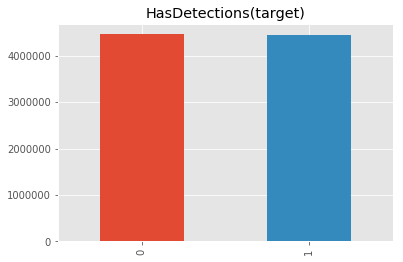

In [116]:
# Plot

train['HasDetections'].value_counts().plot.bar()
plt.title('HasDetections(target)')
plt.show()

    - Well-balanced

#### Census_IsTouchEnabled


Except for 26 columns in total in which one category contains 90% values, "Census_IsTouchEnabled" contains much values of one category. Also, it has no missing values.

In [117]:
plot_categorical_feature('Census_IsTouchEnabled', True)

Census_IsTouchEnabled has 2 unique values and type: int8.
0    0.874457
1    0.125543
Name: Census_IsTouchEnabled, dtype: float64


    - This dataset looks inclined towards nontouch devices.

    - There are few differences between touch and nontouch devices in terms of whether they have detections.

#### EngineVersion


At first I am going to have a look at variables with a lot of categories. "EngineVersion" is a good start of it.

In [118]:
plot_categorical_feature('EngineVersion', by_touch=True)

EngineVersion has 70 unique values and type: category.
1.1.15200.1    0.430990
1.1.15100.1    0.412030
1.1.15000.2    0.029728
1.1.14901.4    0.023809
1.1.14600.4    0.018000
Name: EngineVersion, dtype: float64


    - There are not quite differences between touch and nontouch devices.

    - Some detections rates of the engine versions like "1.1.13504.0" and "1.1.15300.5" are very high. However, the cause might be just due to the small number of them.

#### Census_OSVersion

In [119]:
plot_categorical_feature('Census_OSVersion', True)

Census_OSVersion has 469 unique values and type: category.
10.0.17134.228    0.158452
10.0.17134.165    0.100848
10.0.16299.431    0.061262
10.0.17134.285    0.052713
10.0.16299.547    0.038878
Name: Census_OSVersion, dtype: float64


    - There are not quite differences on any OS versions.

## [Task 3] Fit, Predict, Cross-validation, Grid-search  and Submit

In [24]:
# Narrow down features

ss_train = train.SmartScreen

In [25]:
ss_train

0                   NaN
1                   NaN
2          RequireAdmin
3          ExistsNotSet
4          RequireAdmin
5          RequireAdmin
6                   NaN
7          RequireAdmin
8          RequireAdmin
9          RequireAdmin
10                  NaN
11                  NaN
12                  NaN
13         RequireAdmin
14                  Off
15         ExistsNotSet
16                  NaN
17                  NaN
18                  NaN
19         RequireAdmin
20         RequireAdmin
21         RequireAdmin
22         RequireAdmin
23         RequireAdmin
24         ExistsNotSet
25         RequireAdmin
26                  NaN
27                  NaN
28                  NaN
29                  NaN
30         RequireAdmin
31         RequireAdmin
32                  NaN
33                  NaN
34         ExistsNotSet
35         RequireAdmin
36                  NaN
37         RequireAdmin
38                  NaN
39         RequireAdmin
40                  NaN
41         Requi

In [26]:
ss_test = test.SmartScreen

In [27]:
ss_test

0                   NaN
1          RequireAdmin
2          RequireAdmin
3          RequireAdmin
4          RequireAdmin
5                   NaN
6                   NaN
7                   NaN
8                   NaN
9          RequireAdmin
10                  Off
11         ExistsNotSet
12                  NaN
13                 Warn
14                  NaN
15                  NaN
16         RequireAdmin
17         RequireAdmin
18                  NaN
19                  NaN
20         RequireAdmin
21         ExistsNotSet
22                  NaN
23                  NaN
24         RequireAdmin
25                  NaN
26         RequireAdmin
27                  Off
28                  NaN
29                  NaN
30         RequireAdmin
31                  NaN
32         RequireAdmin
33         RequireAdmin
34         RequireAdmin
35         RequireAdmin
36                  NaN
37         RequireAdmin
38                  NaN
39         RequireAdmin
40         RequireAdmin
41              

In [31]:
# Concatenate the train and test data

ss_df = pd.concat([ss_train, ss_test])

In [32]:
ss_df

0                   NaN
1                   NaN
2          RequireAdmin
3          ExistsNotSet
4          RequireAdmin
5          RequireAdmin
6                   NaN
7          RequireAdmin
8          RequireAdmin
9          RequireAdmin
10                  NaN
11                  NaN
12                  NaN
13         RequireAdmin
14                  Off
15         ExistsNotSet
16                  NaN
17                  NaN
18                  NaN
19         RequireAdmin
20         RequireAdmin
21         RequireAdmin
22         RequireAdmin
23         RequireAdmin
24         ExistsNotSet
25         RequireAdmin
26                  NaN
27                  NaN
28                  NaN
29                  NaN
30         RequireAdmin
31         RequireAdmin
32                  NaN
33                  NaN
34         ExistsNotSet
35         RequireAdmin
36                  NaN
37         RequireAdmin
38                  NaN
39         RequireAdmin
40                  NaN
41         Requi

In [38]:
# Change categorical values

X = pd.get_dummies(ss_df)

In [39]:
X

,&#x01;,&#x02;,&#x03;,0,00000000,BLOCK,Block,Deny,Enabled,ExistsNotSet,OFF,ON,Off,On,Promprt,Prompt,Promt,RequireAdmin,RequiredAdmin,Warn,of,off,on,prompt,requireAdmin,requireadmin,warn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
# TARGET

y = train.HasDetections

In [30]:
y

0          0
1          0
2          0
3          1
4          1
5          1
6          1
7          0
8          0
9          1
10         0
11         1
12         0
13         0
14         1
15         1
16         0
17         0
18         0
19         1
20         0
21         1
22         0
23         0
24         0
25         0
26         1
27         0
28         1
29         1
30         0
31         0
32         1
33         1
34         1
35         0
36         1
37         0
38         1
39         0
40         0
41         1
42         1
43         1
44         1
45         1
46         0
47         1
48         1
49         0
          ..
8921433    0
8921434    0
8921435    0
8921436    1
8921437    0
8921438    1
8921439    1
8921440    0
8921441    0
8921442    1
8921443    1
8921444    1
8921445    1
8921446    1
8921447    0
8921448    0
8921449    1
8921450    0
8921451    0
8921452    0
8921453    0
8921454    0
8921455    0
8921456    1
8921457    1
8921458    0

In [54]:
# Split the train data

X_train = X.iloc[:y.shape[0]]

In [55]:
X_train

,&#x01;,&#x02;,&#x03;,0,00000000,BLOCK,Block,Deny,Enabled,ExistsNotSet,OFF,ON,Off,On,Promprt,Prompt,Promt,RequireAdmin,RequiredAdmin,Warn,of,off,on,prompt,requireAdmin,requireadmin,warn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [60]:
X_test = X.iloc[y.shape[0]:]

In [61]:
X_test

,&#x01;,&#x02;,&#x03;,0,00000000,BLOCK,Block,Deny,Enabled,ExistsNotSet,OFF,ON,Off,On,Promprt,Prompt,Promt,RequireAdmin,RequiredAdmin,Warn,of,off,on,prompt,requireAdmin,requireadmin,warn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [36]:
# Initialize

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [77]:
# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
parameters = dict(C=C)

In [78]:
# Initialize

gs = GridSearchCV(lr, parameters, cv=2)

In [79]:
# Fit

gs.fit(X_train, y)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
# Fit

lr.fit(X_train,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
# Predict

y_pred = lr.predict(X_test)

In [65]:
# Submit

sub = pd.read_csv('sample_submission.csv')

sub['HasDetections'] = y_pred

sub.to_csv('pipeline.csv', index=False)

    - Score: 0.541

## [Task 4] 2 Kinds of Ensemble Learning

### Bagging

    - Bagging has 2 kinds of voting including soft and hard one. Hard voting is just a majority vote of some kinds of models to get a more accurate score than just using a single model. On the other hand, soft voting takes an average of scores of some kinds of models.
    
    - Choosing many kinds of weak learners like random forest is a good way of bagging.

In [93]:
# Initialize

lr2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [94]:
# Initialize

rf = RandomForestClassifier(n_estimators=50, random_state=1)

In [95]:
# Initialize

gnb = GaussianNB()

In [96]:
# Initialize

vc1 = VotingClassifier(estimators=[('lr', lr2), ('rf', rf), ('gnb', gnb)], voting='soft')

In [97]:
# Fit

vc1 = vc1.fit(X_train, y)

In [98]:
# Predict

vc_pred = vc1.predict(X_test)

In [99]:
vc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [100]:
# Submit

sub = pd.read_csv('sample_submission.csv')

sub['HasDetections'] = vc_pred

sub.to_csv('pipeline2.csv', index=False)

    - Score: 0.541

### Boosting

    - Both of bagging and boosting fit a part of a dataset and merge those results finally. Their difference is that bagging does parallel processing while boosting does not. This is because boosting reuses the outputted result of the previous part to fit on the next part.

In [103]:
# LightGBM

lgbm_train = lgbm.Dataset(X_train,y)
lgbm_eval = lgbm.Dataset(X_train, y, reference=lgbm_train)
lgbm_params = {'objective':'binary',
               'boosting_type': 'rf',
               'subsample': 0.623,
               'colsample_bytree': 0.7,
               'num_leaves': 127,
               'max_depth': 8,
               'seed': 99,
               'bagging_freq': 1,
               'n_jobs': 4}

model = lgbm.train(lgbm_params, lgbm_train, valid_sets=lgbm_eval)

[1]	valid_0's binary_logloss: 0.665339
[2]	valid_0's binary_logloss: 0.672935
[3]	valid_0's binary_logloss: 0.669032
[4]	valid_0's binary_logloss: 0.671386
[5]	valid_0's binary_logloss: 0.669294
[6]	valid_0's binary_logloss: 0.668145
[7]	valid_0's binary_logloss: 0.667389
[8]	valid_0's binary_logloss: 0.666935
[9]	valid_0's binary_logloss: 0.667863
[10]	valid_0's binary_logloss: 0.667361
[11]	valid_0's binary_logloss: 0.66822
[12]	valid_0's binary_logloss: 0.669052
[13]	valid_0's binary_logloss: 0.669846
[14]	valid_0's binary_logloss: 0.669223
[15]	valid_0's binary_logloss: 0.66991
[16]	valid_0's binary_logloss: 0.670559
[17]	valid_0's binary_logloss: 0.67117
[18]	valid_0's binary_logloss: 0.670561
[19]	valid_0's binary_logloss: 0.671116
[20]	valid_0's binary_logloss: 0.670583
[21]	valid_0's binary_logloss: 0.670106
[22]	valid_0's binary_logloss: 0.669655
[23]	valid_0's binary_logloss: 0.669292
[24]	valid_0's binary_logloss: 0.668981
[25]	valid_0's binary_logloss: 0.669399
[26]	valid_0

In [104]:
# Predict the test dataset

lgbm_pred = model.predict(X_test)

In [105]:
# Submit

sub = pd.read_csv('sample_submission.csv')

sub['HasDetections'] = lgbm_pred

sub.to_csv('pipeline3.csv', index=False)